<a href="https://colab.research.google.com/github/avs20/SioLabsPython0/blob/main/25_Vizualization_Using_Seaborn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python 

Numpy 

Pandas 

Matplotlib 

In [2]:
#Samuel Norman Seaborn - West Wing - Writer Aaron Sorkin - A few good men, The social network, 
#python - UK Monty Python Circus - python 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 

In [6]:
titanic = pd.read_csv('https://raw.githubusercontent.com/avs20/SioLabsPython0/main/datasets/train.csv')
wines = pd.read_csv('https://raw.githubusercontent.com/avs20/SioLabsPython0/main/datasets/winequality-white.csv', sep = ';')

In [7]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


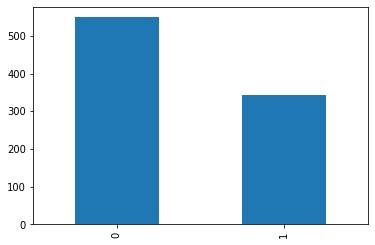

In [10]:
titanic['Survived'].value_counts().plot(kind="bar")

Count plot 

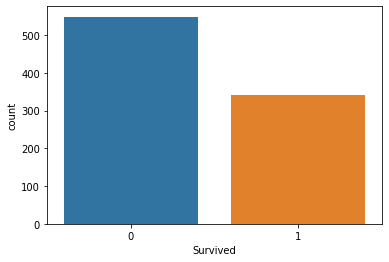

In [13]:
sns.countplot(x = "Survived", data = titanic)
plt.show()

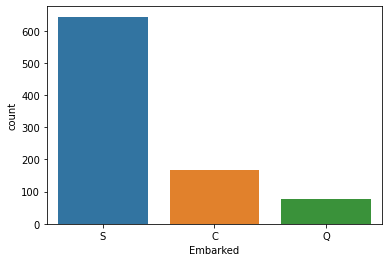

In [14]:
sns.countplot(x = "Embarked", data = titanic)
plt.show()

Scatter Plot 
------

In [16]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


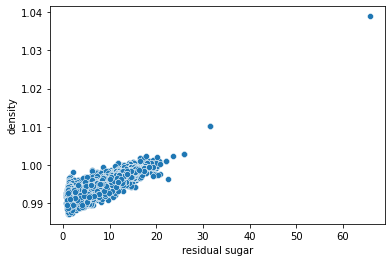

In [19]:
sns.scatterplot(x = "residual sugar", y = "density", data = wines)
plt.show()

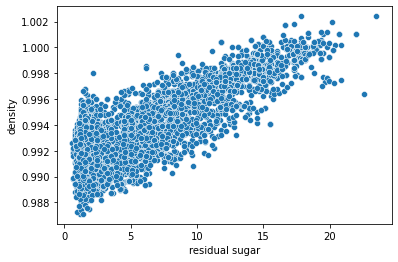

In [22]:
# removing outliers 
wines = wines.loc[wines['residual sugar']<25, :]
sns.scatterplot(x = "residual sugar", y = "density", data = wines)
plt.show()

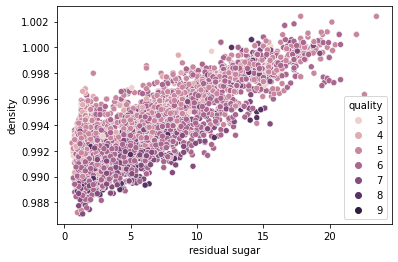

In [23]:
sns.scatterplot(x = "residual sugar", y = "density",hue = "quality", data = wines)
plt.show()

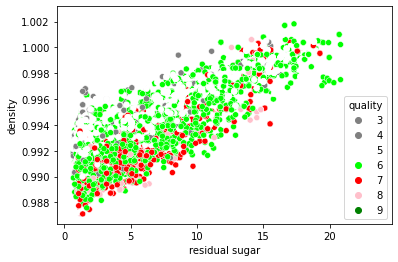

In [27]:
my_colors = {
    3: "#808080",
    4: "gray",
    5: "white",
    6: "#00ff00",
    7: "red",
    8: "pink",
    9: "green"
}
sns.scatterplot(x = "residual sugar", y = "density",hue = "quality", data = wines, palette=my_colors)
plt.show()

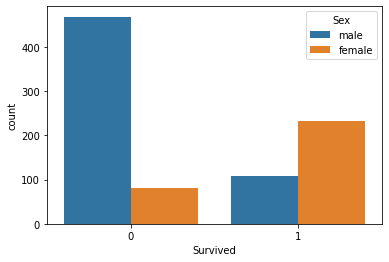

In [28]:
sns.countplot(x = "Survived", data = titanic, hue = "Sex")

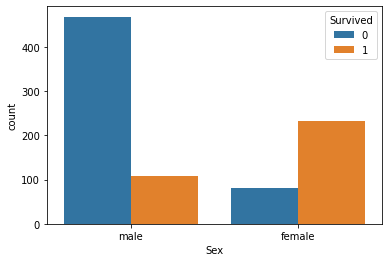

In [29]:
sns.countplot(x = "Sex", data = titanic, hue = "Survived")

In [34]:
medals = pd.read_csv('/content/medals_by_country_2016.csv')
medals.rename(columns = {'Unnamed: 0':'Country'}, inplace = True)

In [35]:
medals

,Country,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55
3,Russia,35,50,28
4,China,35,44,30
5,France,21,20,55
6,Australia,25,23,34
7,Italy,24,8,38
8,Canada,61,4,4
9,Japan,34,17,13


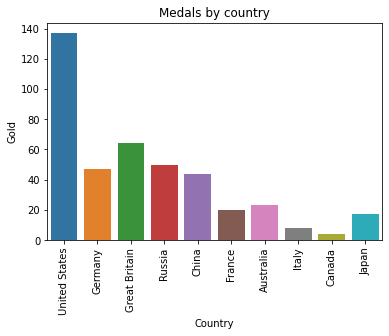

In [41]:
ax  = sns.barplot(x = 'Country', y = "Gold", data = medals)
ax.set_xticklabels(medals['Country'], rotation = 90)
ax.set_title('Medals by country')
plt.show()

relplot
------
Relationals plots 


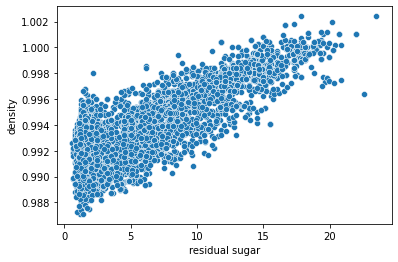

In [42]:
wines = wines.loc[wines['residual sugar']<25, :]
sns.scatterplot(x = "residual sugar", y = "density", data = wines)
plt.show()

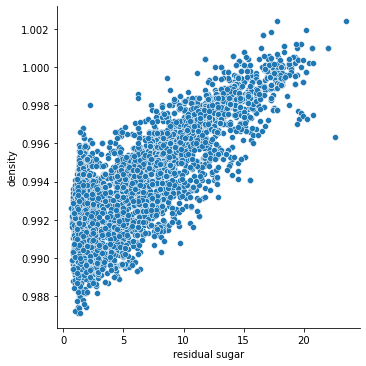

In [43]:
sns.relplot(x = "residual sugar", y = "density", data = wines, kind ="scatter")
plt.show()

In [45]:
def wine_category(quality):
  if quality < 6:
    return "poor"
  if quality < 7:
    return "average"
  else:
    return "great"

wines['wine_category'] = wines['quality'].apply(wine_category)

In [46]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4893 non-null   float64
 1   volatile acidity      4893 non-null   float64
 2   citric acid           4893 non-null   float64
 3   residual sugar        4893 non-null   float64
 4   chlorides             4893 non-null   float64
 5   free sulfur dioxide   4893 non-null   float64
 6   total sulfur dioxide  4893 non-null   float64
 7   density               4893 non-null   float64
 8   pH                    4893 non-null   float64
 9   sulphates             4893 non-null   float64
 10  alcohol               4893 non-null   float64
 11  quality               4893 non-null   int64  
 12  wine_category         4893 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 535.2+ KB


In [48]:
wines.wine_category.value_counts()

average    2193
poor       1640
great      1060
Name: wine_category, dtype: int64

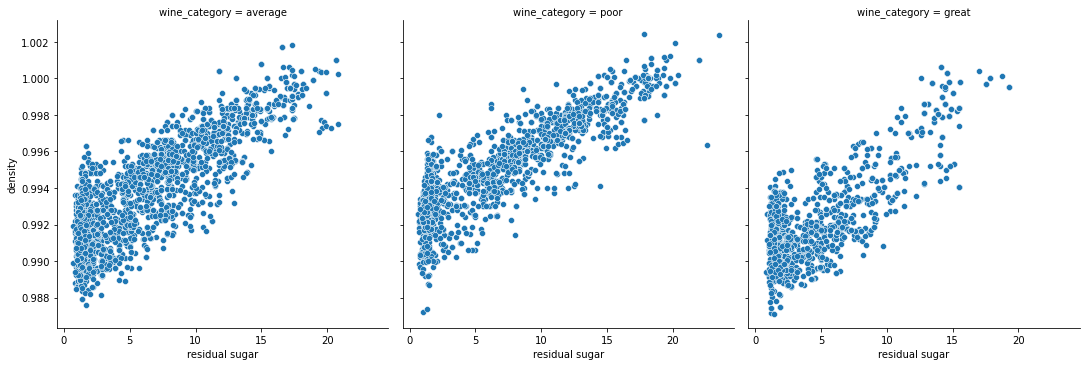

In [50]:
sns.relplot(x = "residual sugar", y = "density", data = wines, kind ="scatter", col="wine_category")
plt.show()

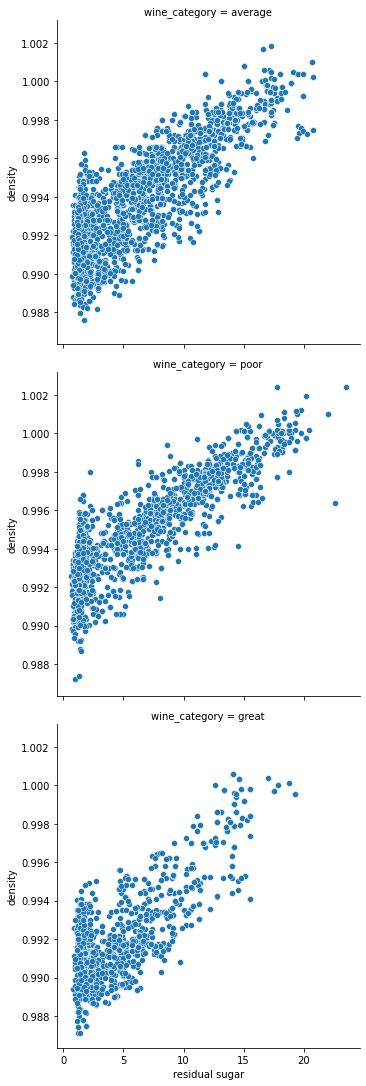

In [51]:
sns.relplot(x = "residual sugar", y = "density", data = wines, kind ="scatter", row="wine_category")
plt.show()

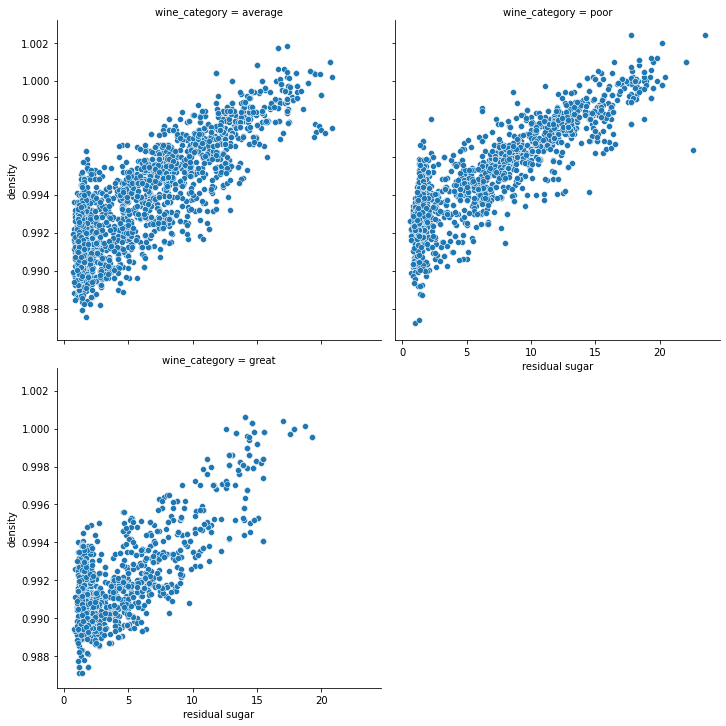

In [52]:
sns.relplot(x = "residual sugar", y = "density", data = wines, kind ="scatter",
            col="wine_category", col_wrap = 2)
plt.show()

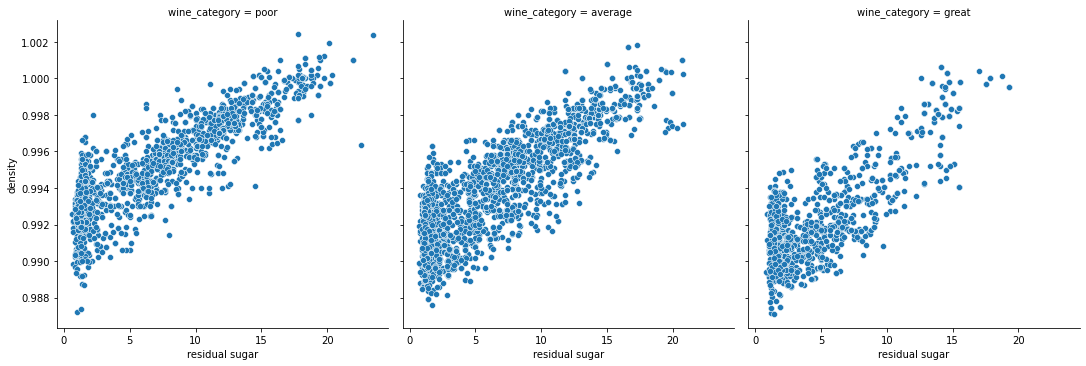

In [53]:
sns.relplot(x = "residual sugar", y = "density", data = wines, kind ="scatter",
            col="wine_category", col_order = ["poor", "average", "great"])
plt.show()

In [54]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4893 non-null   float64
 1   volatile acidity      4893 non-null   float64
 2   citric acid           4893 non-null   float64
 3   residual sugar        4893 non-null   float64
 4   chlorides             4893 non-null   float64
 5   free sulfur dioxide   4893 non-null   float64
 6   total sulfur dioxide  4893 non-null   float64
 7   density               4893 non-null   float64
 8   pH                    4893 non-null   float64
 9   sulphates             4893 non-null   float64
 10  alcohol               4893 non-null   float64
 11  quality               4893 non-null   int64  
 12  wine_category         4893 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 535.2+ KB


In [55]:
wines.alcohol.describe()

count    4893.000000
mean       10.514690
std         1.230643
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

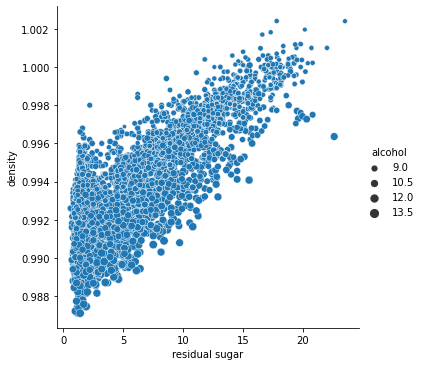

In [56]:
sns.relplot(x = "residual sugar", y = "density", data = wines, kind ="scatter",
            size = "alcohol" )
plt.show()

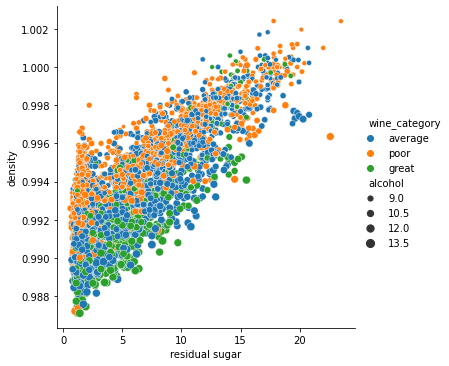

In [57]:
sns.relplot(x = "residual sugar", y = "density", data = wines, kind ="scatter",
            size = "alcohol", hue = "wine_category")
plt.show()

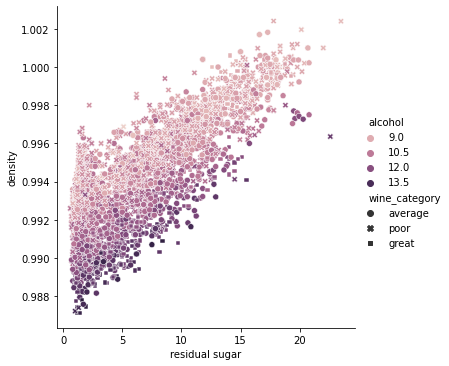

In [59]:
sns.relplot(x = "residual sugar", y = "density", data = wines, kind ="scatter",
            hue = "alcohol", style = "wine_category")
plt.show()

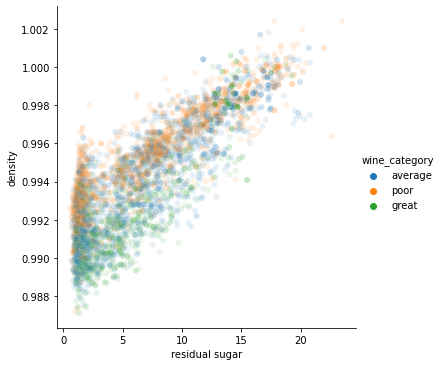

In [76]:
sns.relplot(x = "residual sugar", y = "density", data = wines, kind ="scatter",
             alpha = 0.1, hue = "wine_category")
plt.show()